In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# loading data for exoplanet data (epdf) and transit spectroscopy (transdata)

epdata = pd.read_csv("/content/002PS_2022.07.13_08.13.48.csv")
transdata = pd.read_csv("/content/001transitspec_2022.07.13_08.17.50.csv")
emdata = pd.read_csv("/content/003emissionspec_2022.07.13_08.07.04.csv")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# research questions:
# 1. Are there useful grouping of exoplanets? (clustering)
# 2. There is a lot of missing data. Can we estimate what these missing
#    values might be, given other exoplanet attributes? 
# 3. Which grouping of planets most resemble Earth in physical and chemcial attributes?
# 4. Can we use these data to make renderings of what we think these planets look like?

In [3]:
# transforming data into dataframes
# running correllations on exoplanet data

epdf = pd.DataFrame(epdata)
corr = epdf.corr()

transdf = pd.DataFrame(transdata)
emdf = pd.DataFrame(emdata)

In [4]:
# unstacking correlations and sorting to examine highly correlated features

uscorr = corr.unstack()
uscorrs = uscorr.sort_values(kind="quicksort")

In [5]:
# displaying maximum columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

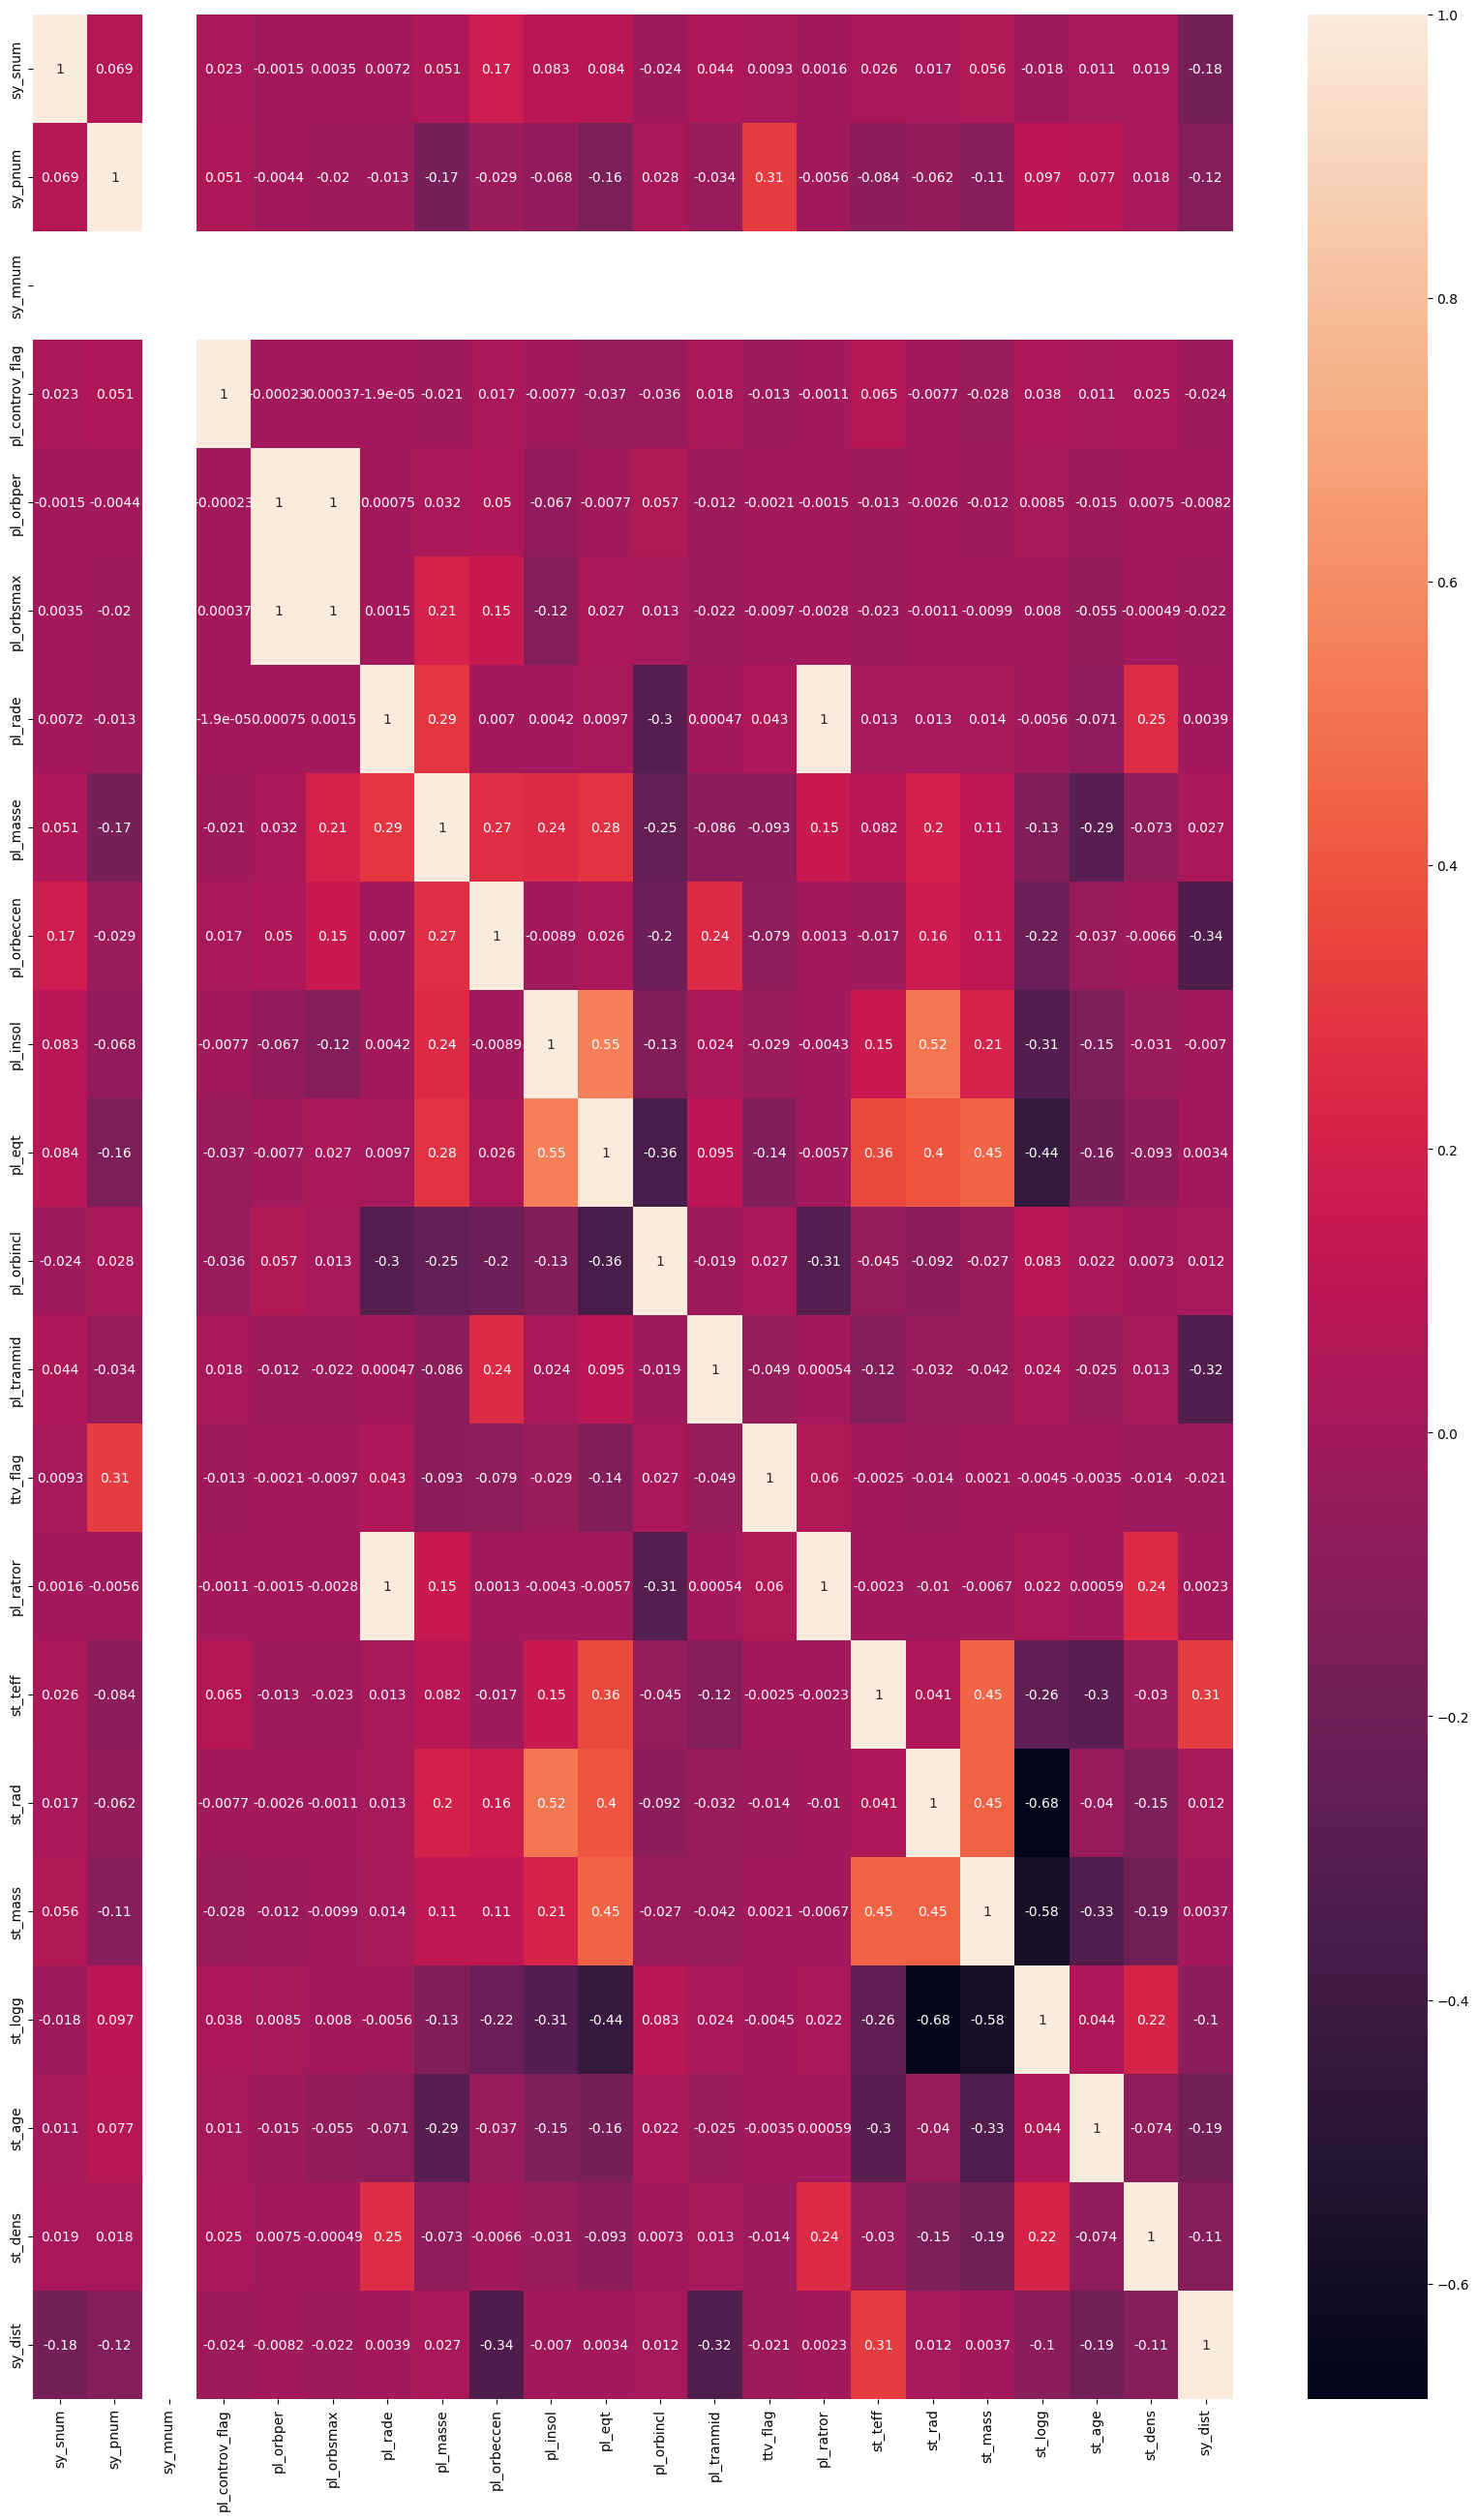

In [7]:
# creating a heatmap to visualize corelations

plt.figure(figsize=(20, 32))
sn.heatmap(corr, annot=True)
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='st_age', ylabel='pl_insol'>

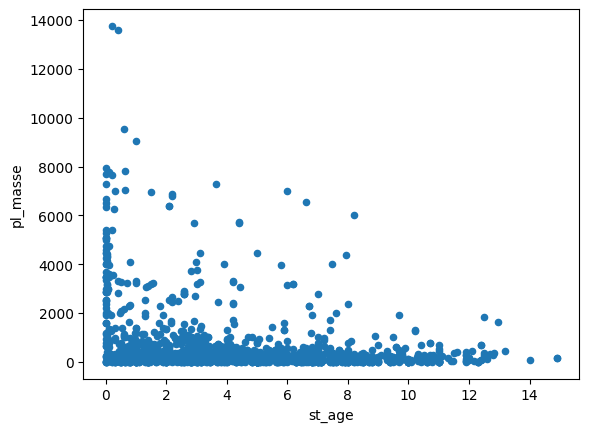

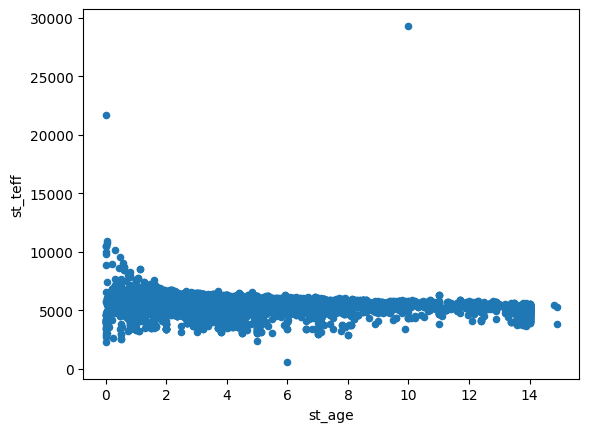

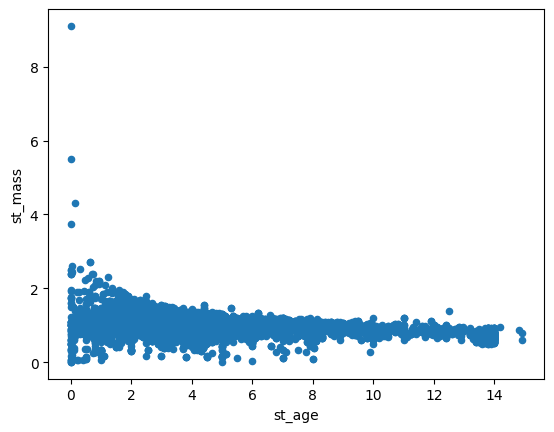

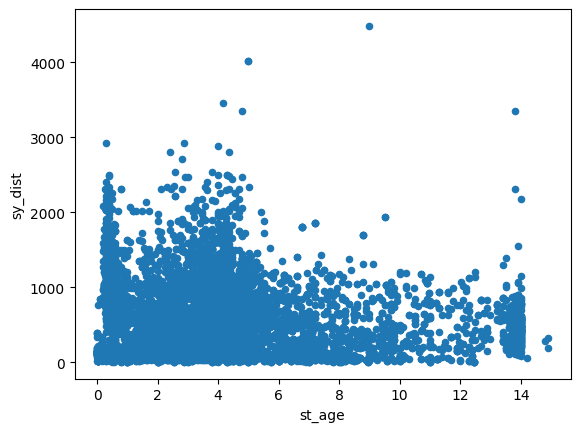

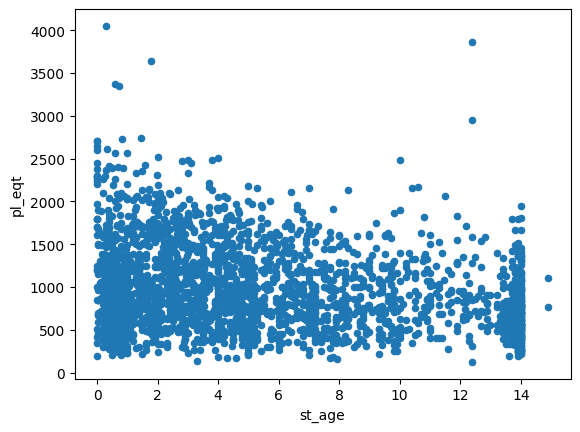

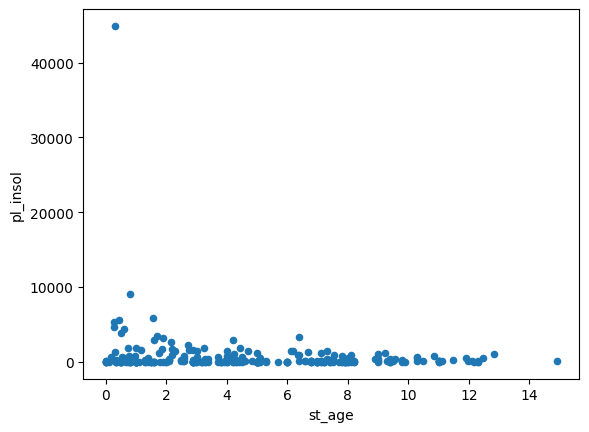

In [8]:
# plotting correlated features

epdf.plot.scatter(x="st_age",y="pl_masse")
epdf.plot.scatter(x="st_age",y="st_teff")
epdf.plot.scatter(x="st_age",y="st_mass")
epdf.plot.scatter(x="st_age",y="sy_dist")
epdf.plot.scatter(x="st_age",y="pl_eqt")
epdf.plot.scatter(x="st_age",y="pl_insol")

In [9]:
# creating table of only planet names and their central wave lengths
# rounding central wave lengths to make managable dummy variable categories

plntcentralwavelng = transdata.loc[:, 'plntname':'centralwavelng'].round(decimals = 3)
plntcentralwavelng.head()

,plntname,centralwavelng
0,WASP-12 b,0.335
1,WASP-12 b,0.405
2,WASP-12 b,0.502
3,WASP-12 b,0.547
4,WASP-12 b,0.555


In [10]:
# creating dummy variables for different grouping of central wave lengths

plntcentralwavelngdummy = pd.concat([plntcentralwavelng, pd.get_dummies(plntcentralwavelng.centralwavelng)], 1).groupby(['plntname']).sum().reset_index()

<ipython-input-10-9ce1a571f879>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  plntcentralwavelngdummy = pd.concat([plntcentralwavelng, pd.get_dummies(plntcentralwavelng.centralwavelng)], 1).groupby(['plntname']).sum().reset_index()


In [11]:
# visualizing dummy variables

plntcentralwavelngdummy.head()

,plntname,centralwavelng,0.205,0.215,0.225,0.235,0.239,0.245,0.255,0.26,0.265,0.267,0.275,0.28,0.285,0.295,0.299,0.305,0.307,0.315,0.325,0.33,0.335,0.338,0.34,0.345,0.347,0.35,0.354,0.355,0.356,0.358,0.36,0.362,0.364,0.365,0.373,0.375,0.376,0.38,0.382,0.384,0.385,0.388,0.393,0.394,0.395,0.397,0.4,0.402,0.403,0.405,0.406,0.407,0.409,0.41,0.412,0.413,0.415,0.417,0.418,0.419,0.42,0.421,0.424,0.425,0.428,0.429,0.43,0.432,0.433,0.435,0.436,0.437,0.438,0.439,0.44,0.441,0.442,0.445,0.446,0.448,0.45,0.451,0.453,0.454,0.455,0.458,0.459,0.46,0.461,0.462,0.463,0.464,0.465,0.468,0.469,0.47,0.472,0.474,0.475,0.476,0.477,0.479,0.48,0.481,0.482,0.484,0.485,0.486,0.487,0.488,0.49,0.491,0.492,0.493,0.494,0.495,0.496,0.498,0.499,0.5,0.501,0.502,0.503,0.505,0.507,0.508,0.509,0.51,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.52,0.521,0.523,0.524,0.525,0.527,0.528,0.529,0.53,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.54,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.55,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.56,0.561,0.562,0.563,0.564,0.565,0.566,0.568,0.569,0.57,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.667,0.668,0.669,0.67,0.672,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.684,0.685,0.686,0.688,0.689,0.69,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7,0.701,0.704,0.705,0.708,0.709,0.71,0.711,0.712,0.713,0.714,0.715,0.717,0.718,0.719,0.72,0.723,0.724,0.725,0.728,0.729,0.73,0.731,0.732,0.733,0.734,0.735,0.737,0.738,0.739,0.74,0.741,0.742,0.743,0.744,0.745,0.747,0.748,0.749,0.75,0.752,0.754,0.755,0.756,0.757,0.758,0.759,0.76,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.77,0.771,0.772,0.773,0.775,0.776,0.779,0.78,0.781,0.782,0.783,0.785,0.786,0.787,0.788,0.789,0.79,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.8,0.801,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.81,0.811,0.812,0.813,0.815,0.816,0.818,0.819,0.82,0.822,0.823,0.824,0.825,0.826,0.828,0.829,0.83,0.831,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.84,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.85,0.852,0.853,0.854,0.855,0.856,0.859,0.86,0.862,0.863,0.865,0.866,0.867,0.868,0.869,0.87,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.88,0.881,0.883,0.884,0.885,0.886,0.887,0.888,0.89,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.9,0.903,0.905,0.906,0.908,0.91,0.911,0.912,0.913,0.915,0.916,0.918,0.919,0.921,0.922,0.923,0.925,0.926,0.93,0.931,0.933,0.935,0.938,0.94,0.943,0.944,0.945,0.948,0.95,0.952,0.953,0.955,0.956,0.957,0.96,0.963,0.964,0.965,0.969,0.97,0.973,0.975,0.98,0.981,0.983,0.985,0.99,0.993,0.994,0.995,1.0,1.003,1.006,1.009,1.01,1.013,1.025,1.03,1.038,1.041,1.055,1.063,1.065,1.068,1.07,1.073,1.075,1.078,1.08,1.082,1.083,1.085,1.087,1.09,1.092,1.095,1.096,1.097,1.1,1.101,1.102,1.104,1.105,1.107,1.108,1.109,1.116,1.118,1.119,1.121,1.122,1.123,1.125,1.126,1.127,1.128,1.13,1.132,1.133,1.134,1.135,1.136,1.137,1.138,1.139,1.14,1.141,1.142,1.143,1.144,1.145,1.146,1.147,1.148,1.149,1.15,1.151,1.153,1.154,1.155,1.156,1.157,1.158,1.159,1.162,1.163,1.164,1.165,1.166,1.167,1.168,1.169,1.17,1.171,1.172,1.174,1.175,1.176,1.177,1.178,1.179,1.18,1.181,1.183,1.184,1.185,1.186,1.188,1.189,1.19,1.191,1.192,1.193,1.194,1.195,1.196,1.199,1.2,1.202,1.203,1.204,1.205,1.207,1.208,1.209,1.21,1.211,1.212,1.213,1.214,1.215,1.216,1.218,1.219,1.22,1.222,1.223,1.224,1.225,1.226,1.227,1.228,1.23,1.231,1.232,1.233,1.234,1.235,1.236,1.237,1.238,1.239,1.24,1.241,1.242,1.244,1.245,1.246,1.247,1.248,1.249,1.25,1.251,1.252,1.253,1

In [12]:
# many exoplanets have multiple observations with varying results;
# because we want to only have once instance of each exoplanet, a column was created to count how many columns per row 
# contained values and kept the observations with the highest amount of data per exoplanet.

# a better data manipulator may instaead want to merge duplicate exoplanet rows somehow.

datacount = epdf.count(axis="columns")
epdf["datacount"] = datacount
epdf.datacount = epdf.datacount.astype(float)
epdf = epdf.sort_values(["datacount"])
epdf.head()

,pl_name,sy_snum,sy_pnum,sy_mnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,ttv_flag,pl_ratror,st_spectype,st_teff,st_rad,st_mass,st_metratio,st_logg,st_age,st_dens,sy_refname,sy_dist,rowupdate,datacount
30911,OGLE-2013-BLG-0341L B b,2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=GOULD_ET_AL__2014 href=https://ui.ad...,NaN,05/12/2019,8.0
30887,OGLE-2012-BLG-0406L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=TSAPRAS_ET_AL__2014 href=https://ui....,NaN,05/12/2019,8.0
30996,OGLE-2017-BLG-0406L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=HIRAO_ET_AL__2020 href=https://ui.ad...,NaN,09/07/2020,8.0
31012,OGLE-2017-BLG-1434L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=UDALSKI_ET_AL__2018 href=https://ui....,NaN,05/12/2019,8.0
30990,OGLE-2016-BLG-1227L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...,NaN,02/04/2020,8.0


In [13]:
# dropping duplicate exoplanets

uniepdf = epdf.drop_duplicates(subset="pl_name", keep="last")
uniepdf.head()

,pl_name,sy_snum,sy_pnum,sy_mnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,ttv_flag,pl_ratror,st_spectype,st_teff,st_rad,st_mass,st_metratio,st_logg,st_age,st_dens,sy_refname,sy_dist,rowupdate,datacount
31200,SR 12 AB c,2,1,0,0,NaN,NaN,NaN,4131.6200,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,14/05/2014,9.0
4661,KMT-2019-BLG-1953L b,1,1,0,0,NaN,NaN,NaN,200.0000,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.31,NaN,NaN,NaN,NaN,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...,7040.0000,08/09/2020,11.0
4665,KMT-2021-BLG-0322L b,2,1,0,0,NaN,NaN,NaN,2034.1018,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN,NaN,<a refstr=HAN_ET_AL__2021 href=https://ui.adsa...,6600.0000,24/01/2022,11.0
622,GJ 676 A c,2,4,0,0,7337.0,6.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,16.0272,27/09/2016,11.0
30808,MXB 1658-298 b,2,1,0,0,760.0,1.613,NaN,7532.5710,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=LEWIN__AMP__JOSS_1981 href=https://u...,NaN,26/07/2017,11.0


In [14]:
# merging transit spectroscopy and exoplanet data

eptransmerge = plntcentralwavelngdummy.merge(uniepdf, left_on="plntname", right_on="pl_name")

In [15]:
# dropping columns we don't need

eptransmerge = eptransmerge.drop(columns = ["ttv_flag","centralwavelng", "datacount","pl_name","pl_controv_flag", "sy_refname","sy_dist", "rowupdate","st_metratio","st_spectype", "plntname"])
eptransmerge.dropna()
eptransmerge.head()

,0.205,0.215,0.225,0.235,0.239,0.245,0.255,0.26,0.265,0.267,0.275,0.28,0.285,0.295,0.299,0.305,0.307,0.315,0.325,0.33,0.335,0.338,0.34,0.345,0.347,0.35,0.354,0.355,0.356,0.358,0.36,0.362,0.364,0.365,0.373,0.375,0.376,0.38,0.382,0.384,0.385,0.388,0.393,0.394,0.395,0.397,0.4,0.402,0.403,0.405,0.406,0.407,0.409,0.41,0.412,0.413,0.415,0.417,0.418,0.419,0.42,0.421,0.424,0.425,0.428,0.429,0.43,0.432,0.433,0.435,0.436,0.437,0.438,0.439,0.44,0.441,0.442,0.445,0.446,0.448,0.45,0.451,0.453,0.454,0.455,0.458,0.459,0.46,0.461,0.462,0.463,0.464,0.465,0.468,0.469,0.47,0.472,0.474,0.475,0.476,0.477,0.479,0.48,0.481,0.482,0.484,0.485,0.486,0.487,0.488,0.49,0.491,0.492,0.493,0.494,0.495,0.496,0.498,0.499,0.5,0.501,0.502,0.503,0.505,0.507,0.508,0.509,0.51,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.52,0.521,0.523,0.524,0.525,0.527,0.528,0.529,0.53,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.54,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.55,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.56,0.561,0.562,0.563,0.564,0.565,0.566,0.568,0.569,0.57,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.667,0.668,0.669,0.67,0.672,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.684,0.685,0.686,0.688,0.689,0.69,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7,0.701,0.704,0.705,0.708,0.709,0.71,0.711,0.712,0.713,0.714,0.715,0.717,0.718,0.719,0.72,0.723,0.724,0.725,0.728,0.729,0.73,0.731,0.732,0.733,0.734,0.735,0.737,0.738,0.739,0.74,0.741,0.742,0.743,0.744,0.745,0.747,0.748,0.749,0.75,0.752,0.754,0.755,0.756,0.757,0.758,0.759,0.76,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.77,0.771,0.772,0.773,0.775,0.776,0.779,0.78,0.781,0.782,0.783,0.785,0.786,0.787,0.788,0.789,0.79,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.8,0.801,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.81,0.811,0.812,0.813,0.815,0.816,0.818,0.819,0.82,0.822,0.823,0.824,0.825,0.826,0.828,0.829,0.83,0.831,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.84,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.85,0.852,0.853,0.854,0.855,0.856,0.859,0.86,0.862,0.863,0.865,0.866,0.867,0.868,0.869,0.87,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.88,0.881,0.883,0.884,0.885,0.886,0.887,0.888,0.89,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.9,0.903,0.905,0.906,0.908,0.91,0.911,0.912,0.913,0.915,0.916,0.918,0.919,0.921,0.922,0.923,0.925,0.926,0.93,0.931,0.933,0.935,0.938,0.94,0.943,0.944,0.945,0.948,0.95,0.952,0.953,0.955,0.956,0.957,0.96,0.963,0.964,0.965,0.969,0.97,0.973,0.975,0.98,0.981,0.983,0.985,0.99,0.993,0.994,0.995,1.0,1.003,1.006,1.009,1.01,1.013,1.025,1.03,1.038,1.041,1.055,1.063,1.065,1.068,1.07,1.073,1.075,1.078,1.08,1.082,1.083,1.085,1.087,1.09,1.092,1.095,1.096,1.097,1.1,1.101,1.102,1.104,1.105,1.107,1.108,1.109,1.116,1.118,1.119,1.121,1.122,1.123,1.125,1.126,1.127,1.128,1.13,1.132,1.133,1.134,1.135,1.136,1.137,1.138,1.139,1.14,1.141,1.142,1.143,1.144,1.145,1.146,1.147,1.148,1.149,1.15,1.151,1.153,1.154,1.155,1.156,1.157,1.158,1.159,1.162,1.163,1.164,1.165,1.166,1.167,1.168,1.169,1.17,1.171,1.172,1.174,1.175,1.176,1.177,1.178,1.179,1.18,1.181,1.183,1.184,1.185,1.186,1.188,1.189,1.19,1.191,1.192,1.193,1.194,1.195,1.196,1.199,1.2,1.202,1.203,1.204,1.205,1.207,1.208,1.209,1.21,1.211,1.212,1.213,1.214,1.215,1.216,1.218,1.219,1.22,1.222,1.223,1.224,1.225,1.226,1.227,1.228,1.23,1.231,1.232,1.233,1.234,1.235,1.236,1.237,1.238,1.239,1.24,1.241,1.242,1.244,1.245,1.246,1.247,1.248,1.249,1.25,1.251,1.252,1.253,1.255,1.257,1.258,1.259,1

In [16]:
# transforming data into floats for model training

eptransmerge = eptransmerge.astype(float)
dtypes = eptransmerge.dtypes

In [17]:
# dropping all NA entries
eptransmerge = eptransmerge.dropna(axis=1)

#converting features to strings for kmeans algo
eptransmerge.columns = eptransmerge.columns.astype(str)

eptransmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Columns: 1088 entries, 0.205 to pl_orbper
dtypes: float64(1088)
memory usage: 876.3 KB


In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

In [19]:
for i in range(2, 51):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(eptransmerge)
  kmeans_labels = kmeans.labels_
  kmeans_centers = kmeans.cluster_centers_
  kmeans_sil_score = metrics.silhouette_score(eptransmerge, kmeans_labels, metric='euclidean')
  print("Score for ", i, "clusters: ", kmeans_sil_score)

Score for  2 clusters:  0.9121174803203125
Score for  3 clusters:  0.7349388431194304
Score for  4 clusters:  0.5987007490658003
Score for  5 clusters:  0.4387682659646237
Score for  6 clusters:  0.30172079307327654
Score for  7 clusters:  0.2940649175460081
Score for  8 clusters:  0.355455912335486
Score for  9 clusters:  0.2870443623594898
Score for  10 clusters:  0.29612279835485444
Score for  11 clusters:  0.29696592357497714
Score for  12 clusters:  0.30319349488922337
Score for  13 clusters:  0.17898146946501173
Score for  14 clusters:  0.18245814954200962
Score for  15 clusters:  0.18738705506736553
Score for  16 clusters:  0.18218321343327346
Score for  17 clusters:  0.17477869598391868
Score for  18 clusters:  0.17457103942127258
Score for  19 clusters:  0.16823443593977008
Score for  20 clusters:  0.17507640509310846
Score for  21 clusters:  0.08371918831065107
Score for  22 clusters:  0.08578121400497858
Score for  23 clusters:  0.1211472126704656
Score for  24 clusters:  0.

In [20]:
 #optimal clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(eptransmerge)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_
kmeans_sil_score = metrics.silhouette_score(eptransmerge, kmeans_labels, metric='euclidean')
print(kmeans_sil_score)
print(kmeans_labels)
print(kmeans_centers)

0.7349388431194304
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0
 0 2 2 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1.07526882e-02 1.07526882e-02 1.07526882e-02 ... 1.82795699e+00
  0.00000000e+00 6.92510050e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 2.89862300e+02]
 [1.73472348e-18 1.73472348e-18 1.73472348e-18 ... 3.33333333e+00
  0.00000000e+00 6.55765003e+01]]


In [21]:
kmeans_labels = pd.DataFrame(kmeans_labels)
kmeans_labels.info()
kmeans_labels.to_csv('kmeans_labels_3_clusters.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       103 non-null    int32
dtypes: int32(1)
memory usage: 540.0 bytes


In [22]:
kmeans_centers = pd.DataFrame(kmeans_centers)
kmeans_centers.columns = eptransmerge.columns
kmeans_centers.to_csv('kmeans_centers_8_clusters.csv')

In [50]:
#using only spect data
transit_data = eptransmerge.drop(columns = ["sy_snum", "sy_pnum","sy_mnum","pl_orbper"])

planet_data = eptransmerge[["sy_snum", "sy_pnum","sy_mnum","pl_orbper"]]
planet_data.head()

,sy_snum,sy_pnum,sy_mnum,pl_orbper
0,2.0,5.0,0.0,0.736544
1,1.0,1.0,0.0,1.508956
2,1.0,2.0,0.0,1.628930
3,1.0,1.0,0.0,1.580404
4,1.0,1.0,0.0,3.336649


In [51]:
for i in range(2, 51):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(planet_data)
  kmeans_labels = kmeans.labels_
  kmeans_centers = kmeans.cluster_centers_
  kmeans_sil_score = metrics.silhouette_score(planet_data, kmeans_labels, metric='euclidean')
  print("Score for ", i, "clusters: ", kmeans_sil_score)

Score for  2 clusters:  0.9275170807986786
Score for  3 clusters:  0.810306278622263
Score for  4 clusters:  0.749565499943809
Score for  5 clusters:  0.6987959521240623
Score for  6 clusters:  0.6749344884002303
Score for  7 clusters:  0.6595077465084769
Score for  8 clusters:  0.6548543596015308
Score for  9 clusters:  0.42600464783076114
Score for  10 clusters:  0.4292867978199434
Score for  11 clusters:  0.41974400097320264
Score for  12 clusters:  0.3923374893962592
Score for  13 clusters:  0.38900825508565096
Score for  14 clusters:  0.399555511427567
Score for  15 clusters:  0.38461320533523186
Score for  16 clusters:  0.3683281345952807
Score for  17 clusters:  0.3593780953778281
Score for  18 clusters:  0.3672677600755487
Score for  19 clusters:  0.37330741143842705
Score for  20 clusters:  0.3854042143073276
Score for  21 clusters:  0.3731519835919138
Score for  22 clusters:  0.34839360973529443
Score for  23 clusters:  0.34939952480476755
Score for  24 clusters:  0.341444692

In [55]:
 #optimal clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(planet_data)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_
kmeans_sil_score = metrics.silhouette_score(planet_data, kmeans_labels, metric='euclidean')
print(kmeans_sil_score)
print(kmeans_labels)
print(kmeans_centers)

0.810306278622263
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0
 0 2 2 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[  1.34408602   1.82795699   0.           6.9251005 ]
 [  1.           1.           0.         289.8623    ]
 [  1.22222222   3.33333333   0.          65.57650028]]


In [56]:
kmeans_centers = pd.DataFrame(kmeans_centers)
kmeans_labels = pd.DataFrame(kmeans_labels)
kmeans_labels_data = pd.merge(planet_data, kmeans_labels, left_index=True, right_index=True)
kmeans_centers.columns = planet_data.columns
# Get the name of the last column
last_col_name = kmeans_labels_data.columns[-1]
# Rename the last column to 'label'
kmeans_labels_data = kmeans_labels_data.rename(columns={last_col_name: 'label'})
kmeans_centers.to_csv('kmeans_centers_3_clusters_planet.csv')
kmeans_labels_data.to_csv('kmeans_labels_3_clusters_planet.csv')

In [27]:
kmeans_labels_data.head()

,0.205,0.215,0.225,0.235,0.239,0.245,0.255,0.26,0.265,0.267,0.275,0.28,0.285,0.295,0.299,0.305,0.307,0.315,0.325,0.33,0.335,0.338,0.34,0.345,0.347,0.35,0.354,0.355,0.356,0.358,0.36,0.362,0.364,0.365,0.373,0.375,0.376,0.38,0.382,0.384,0.385,0.388,0.393,0.394,0.395,0.397,0.4,0.402,0.403,0.405,0.406,0.407,0.409,0.41,0.412,0.413,0.415,0.417,0.418,0.419,0.42,0.421,0.424,0.425,0.428,0.429,0.43,0.432,0.433,0.435,0.436,0.437,0.438,0.439,0.44,0.441,0.442,0.445,0.446,0.448,0.45,0.451,0.453,0.454,0.455,0.458,0.459,0.46,0.461,0.462,0.463,0.464,0.465,0.468,0.469,0.47,0.472,0.474,0.475,0.476,0.477,0.479,0.48,0.481,0.482,0.484,0.485,0.486,0.487,0.488,0.49,0.491,0.492,0.493,0.494,0.495,0.496,0.498,0.499,0.5,0.501,0.502,0.503,0.505,0.507,0.508,0.509,0.51,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.52,0.521,0.523,0.524,0.525,0.527,0.528,0.529,0.53,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.54,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.55,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.56,0.561,0.562,0.563,0.564,0.565,0.566,0.568,0.569,0.57,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.667,0.668,0.669,0.67,0.672,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.684,0.685,0.686,0.688,0.689,0.69,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7,0.701,0.704,0.705,0.708,0.709,0.71,0.711,0.712,0.713,0.714,0.715,0.717,0.718,0.719,0.72,0.723,0.724,0.725,0.728,0.729,0.73,0.731,0.732,0.733,0.734,0.735,0.737,0.738,0.739,0.74,0.741,0.742,0.743,0.744,0.745,0.747,0.748,0.749,0.75,0.752,0.754,0.755,0.756,0.757,0.758,0.759,0.76,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.77,0.771,0.772,0.773,0.775,0.776,0.779,0.78,0.781,0.782,0.783,0.785,0.786,0.787,0.788,0.789,0.79,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.8,0.801,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.81,0.811,0.812,0.813,0.815,0.816,0.818,0.819,0.82,0.822,0.823,0.824,0.825,0.826,0.828,0.829,0.83,0.831,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.84,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.85,0.852,0.853,0.854,0.855,0.856,0.859,0.86,0.862,0.863,0.865,0.866,0.867,0.868,0.869,0.87,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.88,0.881,0.883,0.884,0.885,0.886,0.887,0.888,0.89,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.9,0.903,0.905,0.906,0.908,0.91,0.911,0.912,0.913,0.915,0.916,0.918,0.919,0.921,0.922,0.923,0.925,0.926,0.93,0.931,0.933,0.935,0.938,0.94,0.943,0.944,0.945,0.948,0.95,0.952,0.953,0.955,0.956,0.957,0.96,0.963,0.964,0.965,0.969,0.97,0.973,0.975,0.98,0.981,0.983,0.985,0.99,0.993,0.994,0.995,1.0,1.003,1.006,1.009,1.01,1.013,1.025,1.03,1.038,1.041,1.055,1.063,1.065,1.068,1.07,1.073,1.075,1.078,1.08,1.082,1.083,1.085,1.087,1.09,1.092,1.095,1.096,1.097,1.1,1.101,1.102,1.104,1.105,1.107,1.108,1.109,1.116,1.118,1.119,1.121,1.122,1.123,1.125,1.126,1.127,1.128,1.13,1.132,1.133,1.134,1.135,1.136,1.137,1.138,1.139,1.14,1.141,1.142,1.143,1.144,1.145,1.146,1.147,1.148,1.149,1.15,1.151,1.153,1.154,1.155,1.156,1.157,1.158,1.159,1.162,1.163,1.164,1.165,1.166,1.167,1.168,1.169,1.17,1.171,1.172,1.174,1.175,1.176,1.177,1.178,1.179,1.18,1.181,1.183,1.184,1.185,1.186,1.188,1.189,1.19,1.191,1.192,1.193,1.194,1.195,1.196,1.199,1.2,1.202,1.203,1.204,1.205,1.207,1.208,1.209,1.21,1.211,1.212,1.213,1.214,1.215,1.216,1.218,1.219,1.22,1.222,1.223,1.224,1.225,1.226,1.227,1.228,1.23,1.231,1.232,1.233,1.234,1.235,1.236,1.237,1.238,1.239,1.24,1.241,1.242,1.244,1.245,1.246,1.247,1.248,1.249,1.25,1.251,1.252,1.253,1.255,1.257,1.258,1.259,1

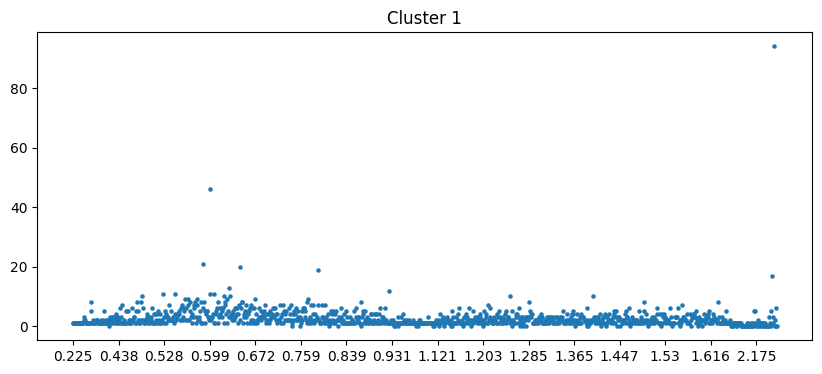

In [28]:
import matplotlib.pyplot as plt

# create a new dataframe with only entries where the label equals zero
df_label_zero = kmeans_labels_data[kmeans_labels_data['label'] == 0]

# extract the x and y data
x = df_label_zero.columns[1:]
y = df_label_zero.iloc[:,1:].values.sum(axis=0)

# plot the scatter plot for the desired entries with smaller points
fig = plt.figure(figsize=(10, 4))
plt.scatter(x, y, s=5)
plt.xticks(x[1::70])
plt.title("Cluster 1")
plt.show()



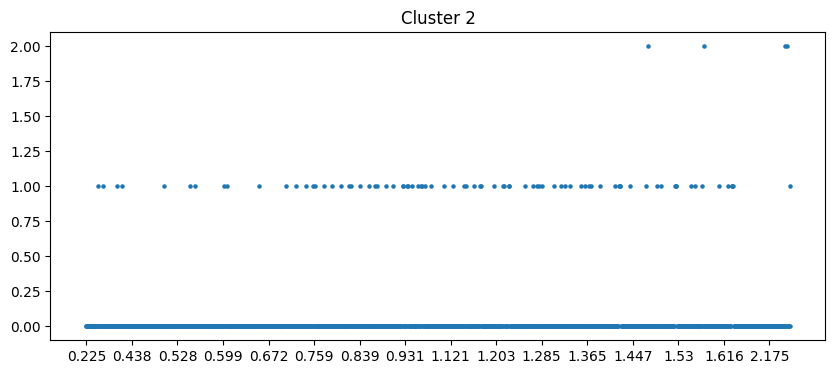

In [29]:
# create a new dataframe with only entries where the label equals zero
df_label_one = kmeans_labels_data[kmeans_labels_data['label'] == 1]

# extract the x and y data
x = df_label_one.columns[1:]
y = df_label_one.iloc[:,1:].values.sum(axis=0)

# plot the scatter plot for the desired entries with smaller points
fig = plt.figure(figsize=(10, 4))
plt.scatter(x, y, s=5)
plt.xticks(x[1::70])
plt.title("Cluster 2")
plt.show()

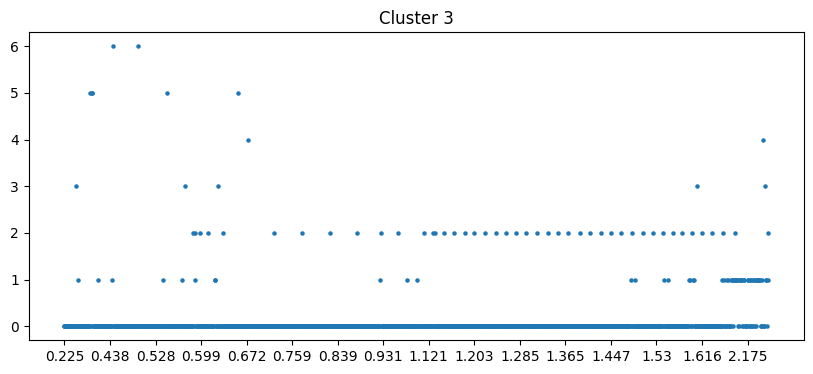

In [30]:
# create a new dataframe with only entries where the label equals zero
df_label_two = kmeans_labels_data[kmeans_labels_data['label'] == 2]

# extract the x and y data
x = df_label_two.columns[1:]
y = df_label_two.iloc[:,1:].values.sum(axis=0)

# plot the scatter plot for the desired entries with smaller points
fig = plt.figure(figsize=(10, 4))
plt.scatter(x, y, s=5)
plt.xticks(x[1::70])
plt.title("Cluster 3")
plt.show()

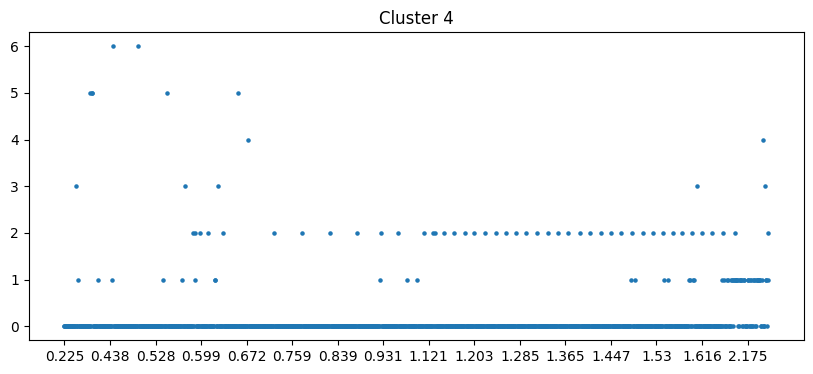

In [31]:
# create a new dataframe with only entries where the label equals zero
df_label_three = kmeans_labels_data[kmeans_labels_data['label'] == 3]

# extract the x and y data
x = df_label_two.columns[1:]
y = df_label_two.iloc[:,1:].values.sum(axis=0)

# plot the scatter plot for the desired entries with smaller points
fig = plt.figure(figsize=(10, 4))
plt.scatter(x, y, s=5)
plt.xticks(x[1::70])
plt.title("Cluster 4")
plt.show()

In [32]:
h_clustering = AgglomerativeClustering().fit(eptransmerge)
cluster_labels = h_clustering.labels_


In [33]:
cluster_labels = pd.DataFrame(cluster_labels)

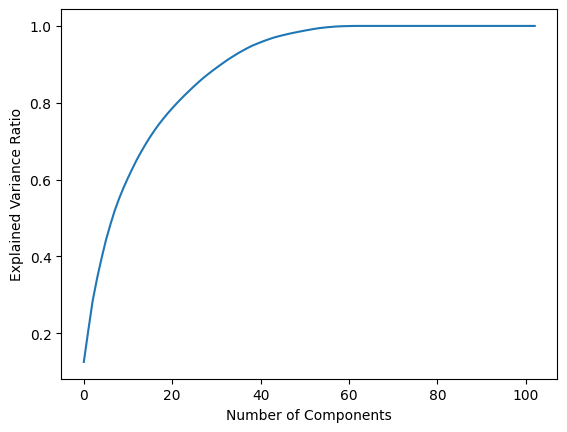

In [34]:
#PCA on transit data
from sklearn.decomposition import PCA

# Create a PCA object and fit it to the data
pca = PCA().fit(transit_data)

# Plot the explained variance ratio for each component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [47]:
# Choose the number of components that explain a desired amount of variance
n_components = 10

# Transform the data to the chosen number of components
pca = PCA(n_components=n_components)
transit_data_PCA = pca.fit_transform(transit_data)

In [48]:
h_clustering = AgglomerativeClustering().fit(transit_data_PCA)
cluster_labels = h_clustering.labels_

In [49]:
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [46]:
for i in range(2, 51):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(transit_data_PCA)
  kmeans_labels = kmeans.labels_
  kmeans_centers = kmeans.cluster_centers_
  kmeans_sil_score = metrics.silhouette_score(transit_data_PCA, kmeans_labels, metric='euclidean')
  print("Score for ", i, "clusters: ", kmeans_sil_score)

Score for  2 clusters:  0.4339121602375642
Score for  3 clusters:  0.4491140192683606
Score for  4 clusters:  0.4550144185792321
Score for  5 clusters:  0.4351614789797333
Score for  6 clusters:  0.4422015393498462
Score for  7 clusters:  0.4539813933534787
Score for  8 clusters:  0.4741386626197407
Score for  9 clusters:  0.4239221575869726
Score for  10 clusters:  0.42738164386387945
Score for  11 clusters:  0.4303711519508003
Score for  12 clusters:  0.4399842131881035
Score for  13 clusters:  0.4432883577151824
Score for  14 clusters:  0.42265337191574975
Score for  15 clusters:  0.4247469036930365
Score for  16 clusters:  0.426542425754298
Score for  17 clusters:  0.4342246916433945
Score for  18 clusters:  0.44206609603217173
Score for  19 clusters:  0.44421725744660184
Score for  20 clusters:  0.44558762249626443
Score for  21 clusters:  0.2341073877907766
Score for  22 clusters:  0.24942893834756835
Score for  23 clusters:  0.2580085626831203
Score for  24 clusters:  0.27553527